In [1]:
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]


In [2]:
def look_at_this_graaaph(result, mode): #mode: 1 = mmr, 2 = mvp
    data = [i[mode] for i in result]
    palette = sns.color_palette('bright')
    color = '#60C6E7'
    if mode == 2:
        color = '#ECC789'
    plot = sns.kdeplot(data, color=color, multiple='stack')
    print('Top % of players')
    for row in result:
        if row[0] in names:
            plot.axvline(row[mode], color=palette.pop(), label=row[0], linewidth=1)
            print(f'{percentage(data, row[mode])}%\t{row[0]}')
    plot.legend()
            
def percentage(data, point):
    p = sum(i for i in data if i>=point)
    d = sum(data)
    x = round(100*(p/d),2)
    return x
    

In [3]:
con = mysql.connector.connect(
    user='leagueperf_adm',
    password = '123',
    host = 'localhost',
    db = 'league_performance')
cur = con.cursor()
q = 'SELECT name, 100*(mmr_mu-3*mmr_sigma) as mmr, 100*(performance_mu - 3*performance_sigma) as mvp FROM summoner_v2 WHERE match_count>49;'
cur.execute(q)
result = cur.fetchall()
del con

In [4]:
names =['kokodiale', 'LaJt0', 'Nurakami Shogun', 'Zuluu','Norcia', 'Mahhmed', 'Sussy Gragussy', 'jumperneon cpc']

Top % of players
33.89%	jumperneon cpc
20.72%	Mahhmed
17.0%	LaJt0
7.14%	kokodiale
5.37%	Zuluu
46.45%	Sussy Gragussy
19.69%	Norcia


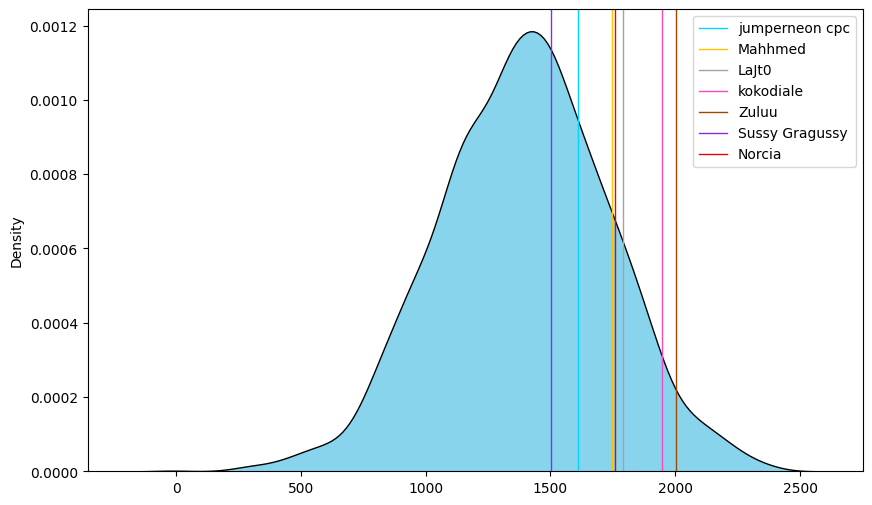

In [5]:
look_at_this_graaaph(result, 1) # MMR Dist

Top % of players
91.04%	jumperneon cpc
21.56%	Mahhmed
48.53%	LaJt0
90.22%	kokodiale
47.82%	Zuluu
1.0%	Sussy Gragussy
80.78%	Norcia


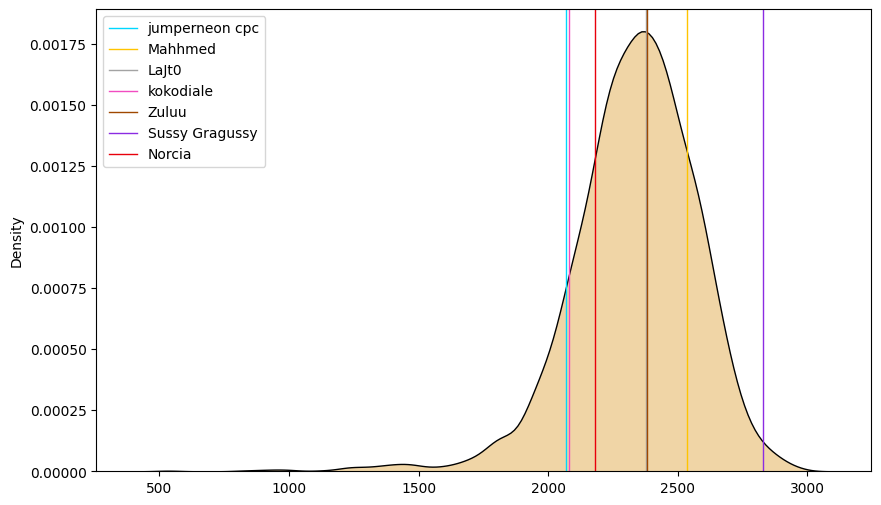

In [6]:
look_at_this_graaaph(result, 2) # MVP Dist

In [246]:
result

[('Yordix25000', 1439.9006843566895, 2587.943208217621),
 ('516', 1183.8646411895752, 2444.308829307556),
 ('SZYNKA12', 1083.8793277740479, 2616.1703169345856),
 ('Lucieus', 1382.753086090088, 2553.491026163101),
 ('XxRokixasXx', 1302.1926879882812, 2574.3277728557587),
 ('Waoren', 867.8769588470459, 1878.9224028587341),
 ('nixutin6000', 345.15743255615234, 1932.5143575668335),
 ('Creamroll', 881.8052768707275, 2234.139895439148),
 ('Frezek', 1488.3140563964844, 2484.4846725463867),
 ('SKT PantLoL ', 2304.2247772216797, 2562.430441379547),
 ('StrzelającyRogal', 675.087308883667, 2166.9504046440125),
 ('MrsMartyna', 947.8160858154297, 2537.8237545490265),
 ('galicdusan0', 650.7972717285156, 2294.8526740074158),
 ('BlueFlame', 1442.1238899230957, 2348.5236763954163),
 ('Worst Player ', 1396.3520050048828, 2387.0795488357544),
 ('Blooddrayne', 677.3665428161621, 2305.5441856384277),
 ('Yummibestchamp', 780.7672500610352, 1951.254826784134),
 ('Orgal', 1276.4126300811768, 2504.207962751388

In [221]:
q = 'SELECT name FROM summoner_v2 WHERE puuid like "EzgKOTc%";'
cur.execute(q)
res = cur.fetchall()

In [222]:
res

[('Yoning Around',)]